## Calculus Review
#### Differentiation
The key to calculus (in fact the fundamental theorem of calculus) states:

$$
\frac{d}{dx}\int_{a}^{x} f(t)dt = f(x)
$$

or if you prefer:

$$
\int_{a}^{b} f(x)dx = F(b) - F(a)
$$

This is important because it equates integral and differential calculus.

The definition of a derivative is:

$$
\frac{dy}{dx} = \lim_{h\to 0}\frac{f(x+h) - f(x)}{h}
$$

Understanding the definition of a derviative is important because computers are by nature discrete machines and thus cannot deal with continuous differentiation or integration. It instead uses approximation with h becoming incredibly small.

#### Chain Rule
Differentiation is important, but as functions get complicated, it becomes important to remember how to differentiate functions with multiple components. This is where chain rule comes into play. It is used extensively in machine learning (see backpropagation for an example). It can be defined as:

$$
\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}
$$

To put this into perspective, if a mathematical model has multiple internal parameters that need to be updated (i.e. different weights) then we need to update the error calculation with respect to the individual weight. This will result in different paths and requires using the chain rule. Let's take a look at a more concrete example:

#### Gradients
Gradients are used all over in system identification. The easiest way to think about it is the partial derivative of each variable in a with a multivariable function:

$$
\nabla f(p) = \begin{bmatrix}
               \frac{\partial f}{\partial x_1} (p) \\
               . \\
               . \\
               . \\
               \frac{\partial f}{\partial x_n} (p)
              \end{bmatrix}
$$

In hyperdimensional planes, this gradient is used to calculate the direction and fastest increase (or fastest decrease if the vector is negated). This is where gradient descent, hill climbing, etc. is derived.

#### Optimization
Back in Calculus I/II the term critical points was likely used a lot. These denoted maxima or minima of a function (local or global). These exist when the derivative of a function is 0. Because of the 0 slope, this means these points are either saddle points, maxima, or minima. All are important areas of study and points to watch out for in machine learning and system identification as they can create traps that our models can get stuck in.  

In [21]:
"""
Code example pulled from https://colab.research.google.com/github/mravanba/comp551-notebooks/blobl/master/GradientDescent.ipynb

Additions made to clarify points and add exercises for testing and experimenting done by Matthew Carroll
"""

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [22]:
class GradientDescent(object):
    def __init__(self, learning_rate: float = 0.001, max_iterations: int = 1e4, epsilon: float = 1e-8, record_history: bool = False):
        self.learning_rate = learning_rate
        self.max_iterations = max_iterations
        self.epsilon = epsilon
        self.record_history = record_history
        if record_history:
            self.w_history = []

    def run(self, gradient_fn, x, y, w):
        grad = np.inf
        t = 1
        while np.linalg.norm(grad) > self.epsilon and t < self.max_iterations:
            grad = gradient_fn(x, y, w)
            w = w - self.learning_rate * grad
            if self.record_history:
                self.w_history.append(w)
            t += 1
        return w


class LinearRegression(object):
    def __init__(self, add_bias: bool = True):
        self.add_bias = add_bias
        self.w = None

    def fit(self, x, y, optimizer):
        if x.ndim == 1:
            x = x[:,None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x, np.ones(N)])
        N,D = x.shape
        def gradient(x, y, w):
            yh = x @ w # Matrix Multiplication
            N,D = x.shape
            grad = .5 * np.dot(yh - y, x)/N
            return grad
        w0 = np.zeros(D)
        self.w = optimizer.run(gradient, x, y, w0)
        return self

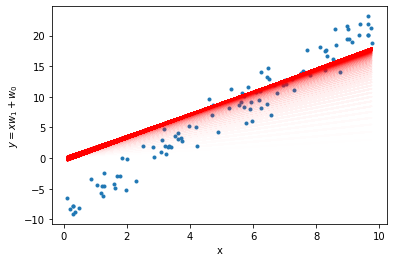

In [23]:
N = 100
x = np.random.rand(N) * 10
y = 3*x - 8 + 2*np.random.randn(N)
optimizer = GradientDescent(learning_rate=0.005, max_iterations=200, record_history=True)
model = LinearRegression()
model.fit(x, y, optimizer)
plt.plot(x, y, '.')
for t, w in enumerate(optimizer.w_history):
    plt.plot(x, x*w[0]+w[1], 'r-', alpha=t/len(optimizer.w_history), label=str(t))
plt.xlabel('x')
plt.ylabel(r'$y=xw_1 + w_0$')
plt.show()

In [24]:
import itertools
def plot_contour(f, x1bound, x2bound, resolution, ax):
    x1range = np.linspace(x1bound[0], x1bound[1], resolution)
    x2range = np.linspace(x2bound[0], x2bound[1], resolution)
    xg, yg = np.meshgrid(x1range, x2range)
    zg = np.zeros_like(xg)
    for i,j in itertools.product(range(resolution), range(resolution)):
        zg[i,j] = f([xg[i,j], yg[i,j]])
    ax.contour(xg, yg, zg, 100)
    return ax

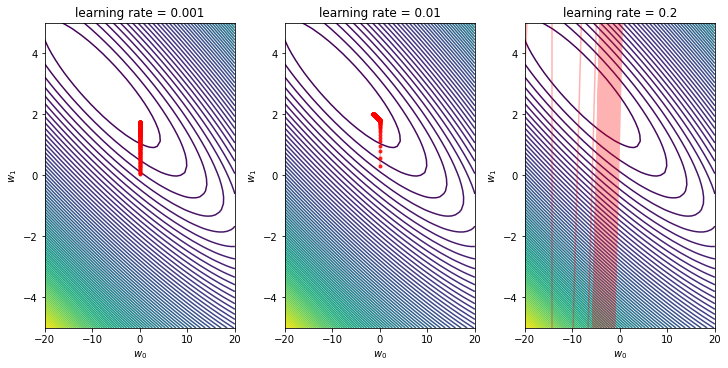

In [25]:
cost = lambda w: .5 * np.mean((w[0] + w[1]*x - y)**2) # Loss function
learning_rates = [.001, .01, .2]
fig, axes = plt.subplots(ncols=len(learning_rates), nrows=1, constrained_layout=True, figsize=(10, 5))
for i, lr in enumerate(learning_rates):
    optimizer = GradientDescent(learning_rate=lr, max_iterations=200, record_history=True)
    model = LinearRegression()
    model.fit(x, y, optimizer)
    plot_contour(cost, [-20,20], [-5,5], 50, axes[i])
    w_hist = np.vstack(optimizer.w_history)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '.r', alpha=.8)
    axes[i].plot(w_hist[:,1], w_hist[:,0], '-r', alpha=.3)
    axes[i].set_xlabel(r'$w_0$')
    axes[i].set_ylabel(r'$w_1$')
    axes[i].set_title(f'learning rate = {lr}')
    axes[i].set_xlim([-20,20])
    axes[i].set_ylim([-5,5])
plt.show()